In [15]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
#Reading the data
with open ('C:\\Users\\am998\\OneDrive\\Desktop\\Loan_approval\\Loan_Approval_Analysis\\data\\raw\\loan_approval_dataset.json') as f:
    data=json.load(f)


In [13]:
#Converting into dataframe
df=pd.DataFrame(data)

In [15]:
#Checking the first 5 rows of the dataframe
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [16]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [17]:
df.describe()  #Checking the summary statistics of the data


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [18]:
#Checking the skewness of the data
df.skew()

C:\Users\am998\AppData\Local\Temp\ipykernel_6028\1983217536.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Id                   0.000000
Income               0.005958
Age                 -0.005316
Experience          -0.012779
CURRENT_JOB_YRS      0.273146
CURRENT_HOUSE_YRS    0.006786
Risk_Flag            2.295734
dtype: float64

In [20]:
#Checking the missing values in the data
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [21]:
#Checking the unique values in the data
df.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

C:\Users\am998\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

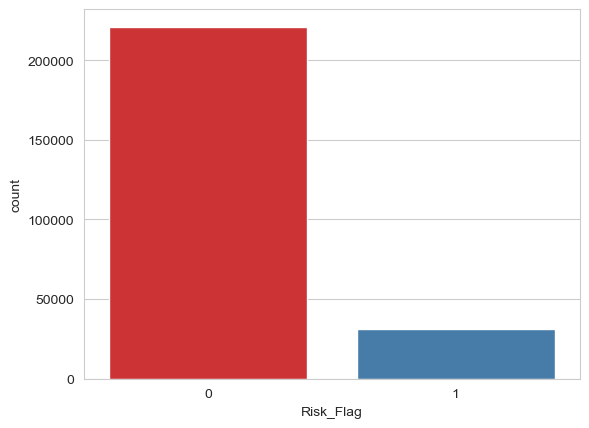

In [24]:
#Checking the distribution of the target variable
sns.countplot(df['Risk_Flag'],palette='Set1')

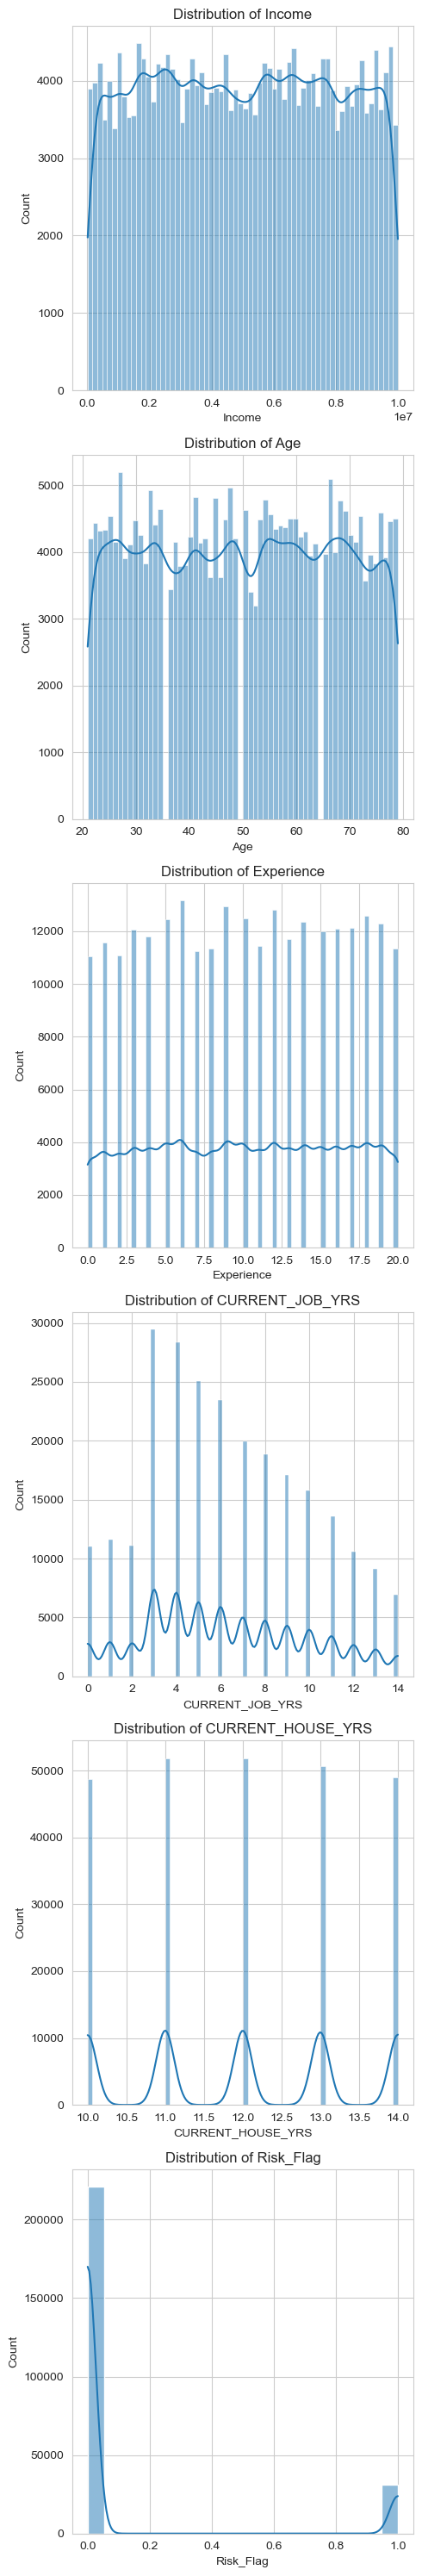

In [29]:
#Checking the Distribution of the columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of all columns you want to check distribution for
columns = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

fig, axs = plt.subplots(len(columns), figsize=(5, 5*len(columns)))

for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axs[i],kde=True)
    axs[i].set_title('Distribution of ' + col)

plt.tight_layout()
plt.show()

<AxesSubplot:>

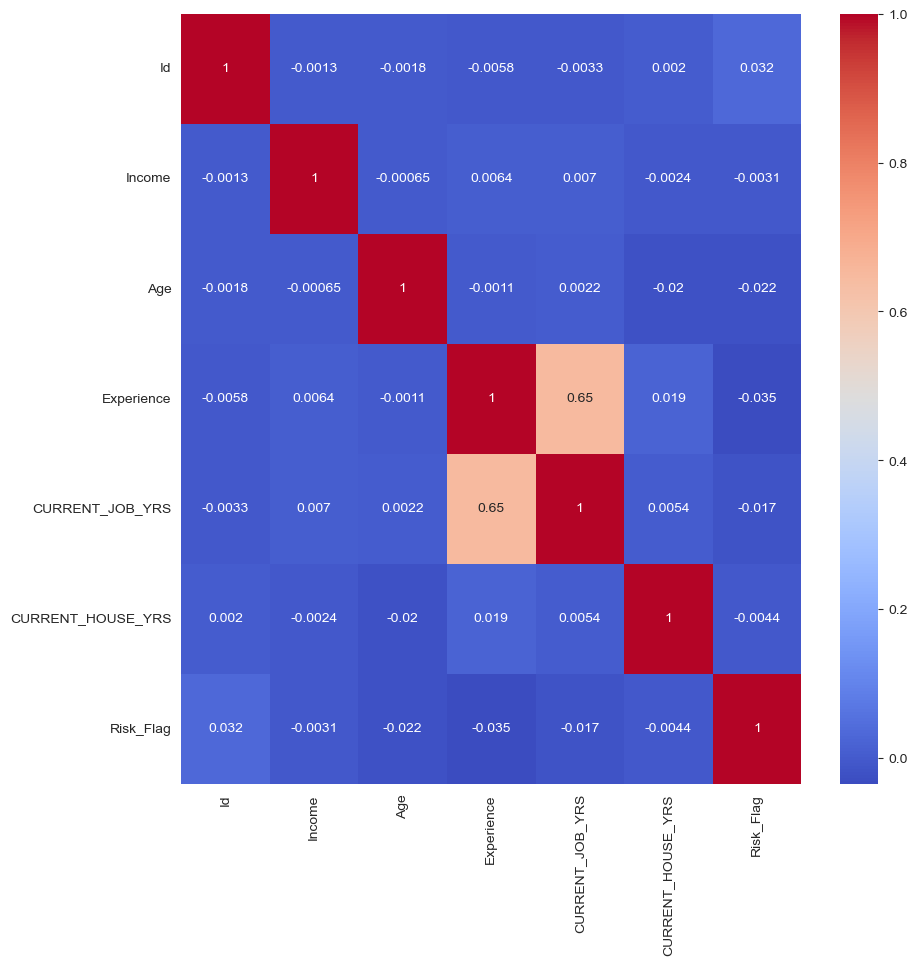

In [31]:
#Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

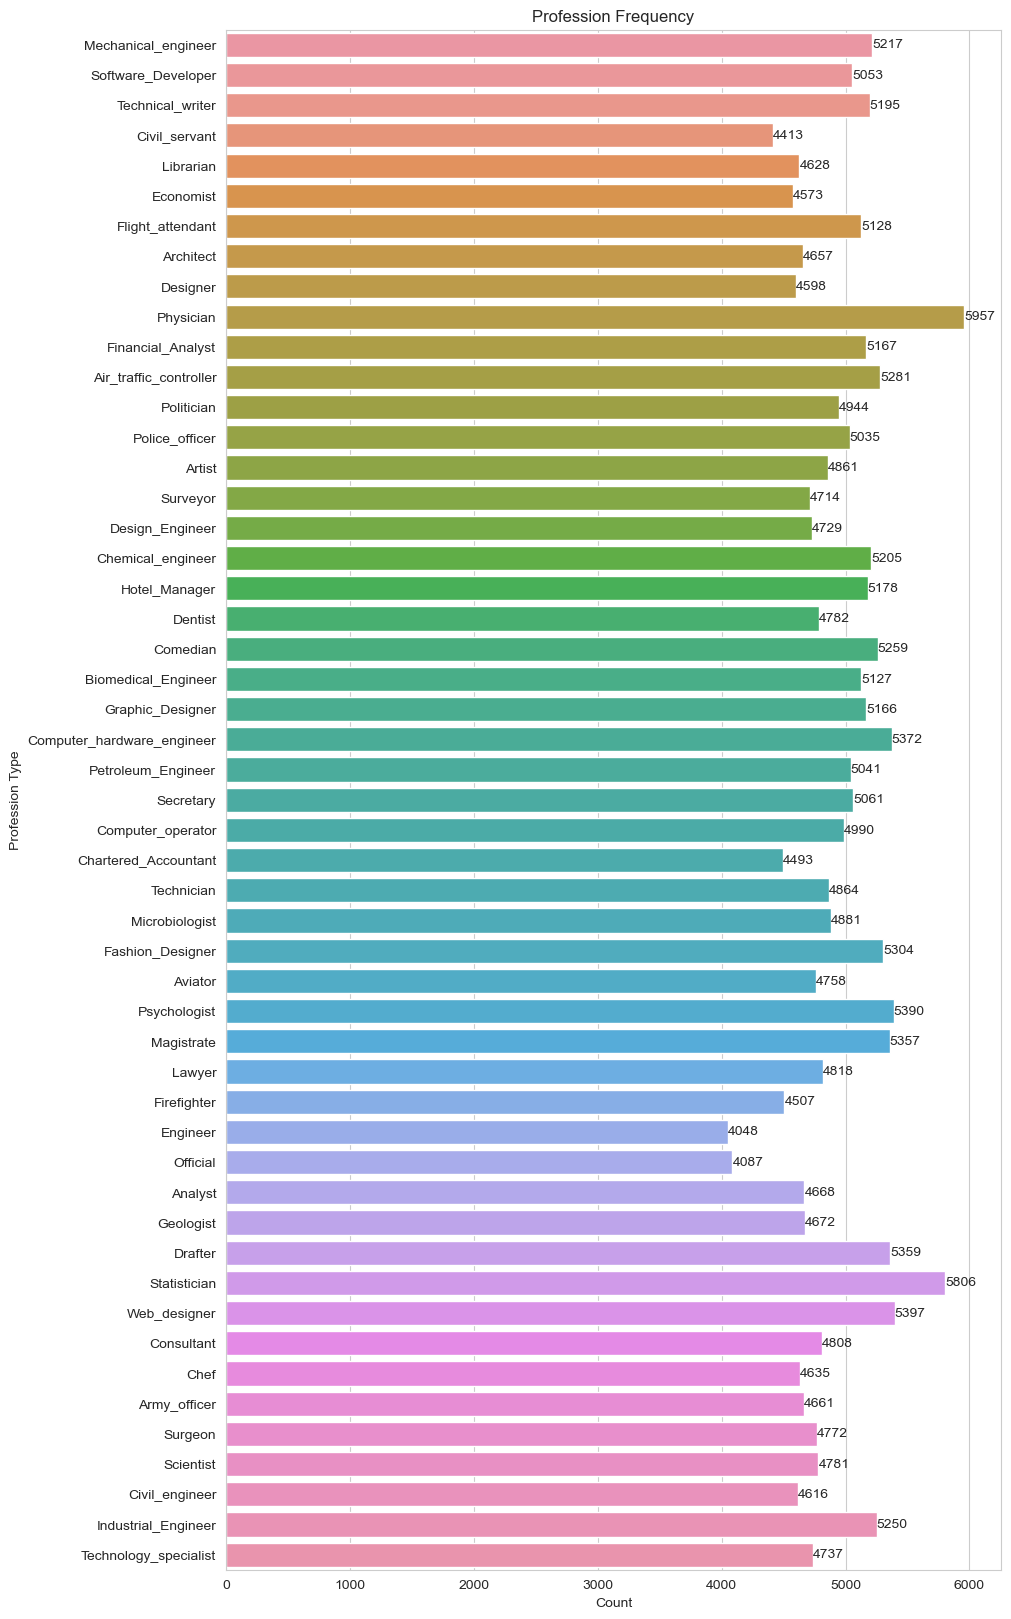

In [33]:
plt.figure(figsize=(10, 20))
ax = sns.countplot(y=df['Profession'])

plt.title("Profession Frequency")
plt.ylabel("Profession Type")
plt.xlabel("Count")

for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [34]:
#Top Highly correlated features with the target variable
corr_matrix = df.corr()
corr_matrix['Risk_Flag'].sort_values(ascending=False)


Risk_Flag            1.000000
Id                   0.032153
Income              -0.003091
CURRENT_HOUSE_YRS   -0.004375
CURRENT_JOB_YRS     -0.016942
Age                 -0.021809
Experience          -0.034523
Name: Risk_Flag, dtype: float64

In [42]:
#Splitting the data into X and y
from sklearn.model_selection import train_test_split
X=df.drop('Risk_Flag',axis=1)
y=df['Risk_Flag']   
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)



In [43]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = X.select_dtypes(include=['object']).columns # Selecting the categorical columns
# Encode categorical columns in training set
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])

# Encode categorical columns in validation set
for col in categorical_columns:
    X_val[col] = le.transform(X_val[col])

# Encode categorical columns in testing set
for col in categorical_columns:
    X_test[col] = le.transform(X_test[col])

# Print the encoded datasets
print("X_train:")
print(X_train.head())

print("\nX_val:")
print(X_val.head())

print("\nX_test:")
print(X_test.head())
    

X_train:
            Id   Income  Age  Experience  Married/Single  House_Ownership  \
200471  200472  9121364   70          18               1                2   
92611    92612  2636544   39           0               1                2   
86397    86398  1010539   39           9               1                2   
110500  110501  3897430   21           2               1                2   
185133  185134  9470213   41           5               1                0   

        Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  \
200471              0           4   270     20                3   
92611               0          13   311     22                0   
86397               0          42   123     23                4   
110500              0          48   295      1                2   
185133              1          50    56     11                5   

        CURRENT_HOUSE_YRS  
200471                 11  
92611                  11  
86397                  13  
110500       

<AxesSubplot:>

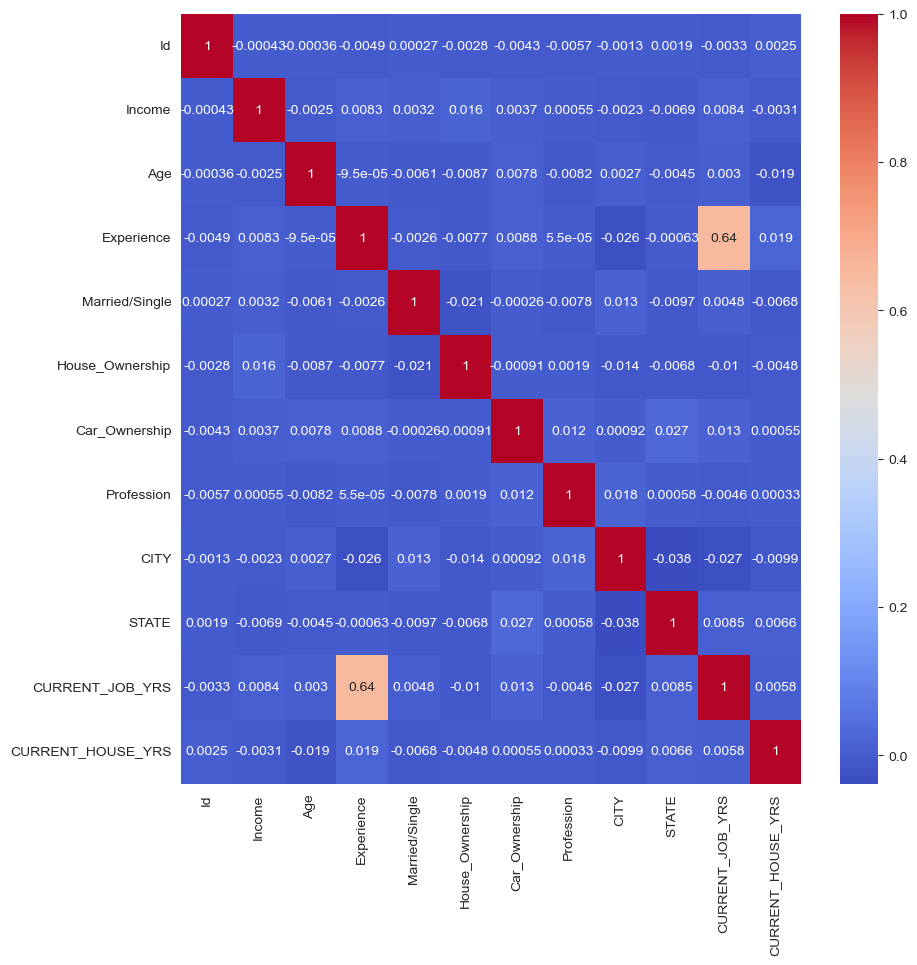

In [44]:
#Checking the correlation matrix after encoding
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')



In [47]:
from sklearn.preprocessing import StandardScaler

numerical_features = X.select_dtypes(include=['int64','float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features in training set
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Scale numerical features in validation set
X_val[numerical_features] = scaler.transform(X_val[numerical_features])

# Scale numerical features in testing set
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [48]:
X_train.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,1.024787,1.430422,1.170436,1.318759,1,2,0,4,270,20,-0.914084,-0.712569
92611,-0.457717,-0.820701,-0.644922,-1.680840,1,2,0,13,311,22,-1.736837,-0.712569
86397,-0.543127,-1.385148,-0.644922,-0.181041,1,2,0,42,123,23,-0.639833,0.717243
110500,-0.211838,-0.383000,-1.699001,-1.347551,1,2,0,48,295,1,-1.188335,0.002337
185133,0.813971,1.551521,-0.527803,-0.847618,1,0,1,50,56,11,-0.365582,0.717243


In [49]:
# Remove the 'Id' column from all datasets
X_train = X_train.drop('Id', axis=1)
X_val = X_val.drop('Id', axis=1)
X_test = X_test.drop('Id', axis=1)

In [50]:
#Saving the preprocessed data
X_train.to_csv('C:\\Users\\am998\\OneDrive\\Desktop\\Loan_approval\\Loan_Approval_Analysis\\data\\processed\\X_train.csv',index=False)
X_val.to_csv('C:\\Users\\am998\\OneDrive\\Desktop\\Loan_approval\\Loan_Approval_Analysis\\data\\processed\\X_val.csv',index=False)
X_test.to_csv('C:\\Users\\am998\\OneDrive\\Desktop\\Loan_approval\\Loan_Approval_Analysis\\data\\processed\\X_test.csv',index=False)
y_train.to_csv('C:\\Users\\am998\\OneDrive\\Desktop\\Loan_approval\\Loan_Approval_Analysis\\data\\processed\\y_train.csv',index=False)
y_val.to_csv('C:\\Users\\am998\\OneDrive\\Desktop\\Loan_approval\\Loan_Approval_Analysis\\data\\processed\\y_val.csv',index=False)
y_test.to_csv('C:\\Users\\am998\\OneDrive\\Desktop\\Loan_approval\\Loan_Approval_Analysis\\data\\processed\\y_test.csv',index=False)
